<a href="https://colab.research.google.com/github/yoshimethod/bioinformatics/blob/main/bioinformatics_pr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.9 MB/s eta 0:00:00


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import sklearn
import torch

In [4]:
#GPUが使用可能であるかを確認する
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [5]:
import numpy as np

data=[[1,2], [3,4]]
np_data=np.array(data)
print(np_data)

[[1 2]
 [3 4]]


In [6]:
import torch
tensor_data=torch.tensor(data)
print(tensor_data)

tensor([[1, 2],
        [3, 4]])


In [7]:
tensor_from_np=torch.from_numpy(np_data)
tensor_from_np

tensor([[1, 2],
        [3, 4]])

In [8]:
tensor_random=torch.rand_like(tensor_data, dtype=torch.float)
print(tensor_random)

tensor([[0.1466, 0.3413],
        [0.5262, 0.1211]])


In [9]:
tensor=torch.ones(4,4)
tensor.to(device)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [10]:
tensor[:,1]=0
tensor[1,:]=3
print(tensor)

tensor([[1., 0., 1., 1.],
        [3., 3., 3., 3.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
print('0行目：', tensor[0])
print('1行目：', tensor[:, 1])
print('最終列：', tensor[:, -1])

0行目： tensor([1., 0., 1., 1.])
1行目： tensor([0., 3., 0., 0.])
最終列： tensor([1., 3., 1., 1.])


In [12]:
t1=torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [13]:
tensor @ tensor

tensor([[ 3.,  0.,  3.,  3.],
        [18.,  9., 18., 18.],
        [ 3.,  0.,  3.,  3.],
        [ 3.,  0.,  3.,  3.]])

In [14]:
tensor * tensor

tensor([[1., 0., 1., 1.],
        [9., 9., 9., 9.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [15]:
sum_item=tensor.sum().item()
print(sum_item, type(sum_item))

21.0 <class 'float'>


In [16]:
print(tensor, '\n')
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [3., 3., 3., 3.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [8., 8., 8., 8.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [19]:
t=torch.ones(5)
print('tensor: ', t)
n=t.numpy()
print('numpy: ', n)

tensor:  tensor([1., 1., 1., 1., 1.])
numpy:  [1. 1. 1. 1. 1.]


In [20]:
t.add_(1)
print('tensor: ', t)
print('numpy: ', n)

tensor:  tensor([2., 2., 2., 2., 2.])
numpy:  [2. 2. 2. 2. 2.]


In [21]:
n=np.ones(5)
t=torch.from_numpy(n)

In [22]:
np.add(n, 3, out=n)
print('tensor: ', t)
print('numpy:', n)

tensor:  tensor([4., 4., 4., 4., 4.], dtype=torch.float64)
numpy: [4. 4. 4. 4. 4.]


In [1]:
predicted_probability_p=[0.8, 0.2, 0.6]
true_label_t=[1.0, 0, 0]
import numpy as np
BCE_0=-true_label_t[0]*np.log(predicted_probability_p[0])
BCE_1=-(1-true_label_t[1])*np.log(1-predicted_probability_p[1])
BCE_2=-(1-true_label_t[2])*np.log(1-predicted_probability_p[2])
print(BCE_0, BCE_1, BCE_2)

0.2231435513142097 0.2231435513142097 0.916290731874155


In [2]:
np.mean([BCE_0, BCE_1, BCE_2])

0.45419261150085816

In [3]:
import torch
import torch.nn as nn

loss=nn.BCELoss()
p_tensor=torch.tensor(predicted_probability_p)
t_tensor=torch.tensor(true_label_t)
loss(p_tensor, t_tensor)

tensor(0.4542)

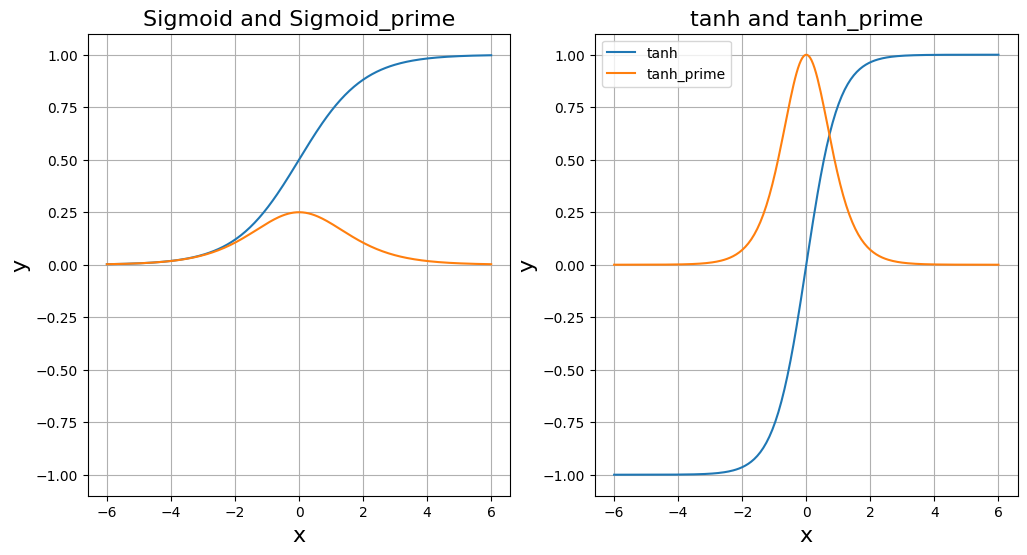

In [15]:
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1/(1+np.exp(-x))
def sigmoid_prime(x):
  return (np.exp(x))/((1+np.exp(x))**2)
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def tanh_prime(x):
  return 4 / (np.exp(x)+np.exp(-x))**2


x=np.linspace(-6, 6, 256)
fig=plt.figure(figsize=(12, 6))

ax1=fig.add_subplot(121)
ax1.set_title('Sigmoid and Sigmoid_prime', size=16)
ax1.set_xlabel('x', size=16)
ax1.set_ylabel('y', size=16)
ax1.grid(axis='both')
ax1.set_ylim(-1.1,1.1)

ax1.plot(x, sigmoid(x), color='#1f77b4', label='sigmoid')
ax1.plot(x, sigmoid_prime(x), color='#ff7f0e', label='sigmoid_prime')

ax2=fig.add_subplot(122)
ax2.set_title('tanh and tanh_prime', size=16)
ax2.set_xlabel('x', size=16)
ax2.set_ylabel('y', size=16)
ax2.grid(axis='both')
ax2.set_ylim(-1.1, 1.1)

ax2.plot(x, tanh(x), color='#1f77b4', label='tanh')
ax2.plot(x, tanh_prime(x), color='#ff7f0e', label='tanh_prime')
ax2.legend()





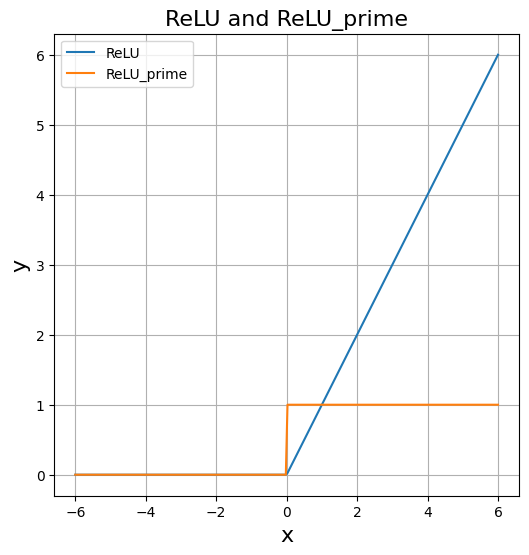

In [17]:
def ReLU(x):
  return np.maximum(0, x)

def ReLU_prime(x):
  return np.where(x>0, 1, 0)

x=np.linspace(-6, 6, 256)
fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(111)
ax.set_title('ReLU and ReLU_prime', size=16)
ax.set_xlabel('x', size=16)
ax.set_ylabel('y', size=16)
ax.grid(axis='both')

ax.plot(x, ReLU(x), color='#1f77b4', label='ReLU')
ax.plot(x, ReLU_prime(x), color='#ff7f0e', label='ReLU_prime')
ax.legend()